In [1]:
import pandas as pd
import numpy as np

# read in all our data
nfl_data= pd.read_csv("C:/Users/Dell/Desktop/weka data new/pbp-2016.csv")
nfl_data.head(20)

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2016090800,08/09/2016,1,0,0,NaN,CAR,?,?,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
1,2016090800,08/09/2016,4,2,0,NaN,CAR,?,?,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
2,2016091100,11/09/2016,4,6,18,NaN,TB,?,?,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
3,2016091100,11/09/2016,4,0,0,NaN,TB,?,?,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
4,2016091101,11/09/2016,2,0,0,NaN,BUF,?,?,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
5,2016091102,11/09/2016,1,0,0,NaN,CHI,?,?,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
6,2016091102,11/09/2016,2,3,14,HOU,CHI,?,?,85,...,0,0,NaN,15,OPP,0,NaN,0,NaN,0
7,2016091102,11/09/2016,2,0,30,NaN,CHI,?,?,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
8,2016091102,11/09/2016,3,13,9,HOU,CHI,1,15,85,...,0,0,NaN,15,OPP,0,NaN,0,NaN,0
9,2016091102,11/09/2016,4,4,6,NaN,CHI,0,?,?,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0


In [2]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

GameId            0
GameDate          0
Quarter           0
Minute            0
Second            0
OffenseTeam    3376
DefenseTeam       0
Down              0
ToGo              0
YardLine          0
dtype: int64

In [3]:
total_cell=np.product(nfl_data.shape)
total_missing=missing_values_count.sum()
print(total_missing)
per_missing=(total_missing/total_cell)*100
print(per_missing)

379790
18.366907744723243


In [4]:
missing_values_count[0:10]

GameId            0
GameDate          0
Quarter           0
Minute            0
Second            0
OffenseTeam    3376
DefenseTeam       0
Down              0
ToGo              0
YardLine          0
dtype: int64

In [6]:
subset_nfl_data = nfl_data.loc[:, 'GameId':'Down']

In [7]:
subset_nfl_data = nfl_data.loc[:, 'GameDate':'Down'].head()

In [8]:
subset_nfl_data.head()

,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down
0,08/09/2016,1,0,0,NaN,CAR,?
1,08/09/2016,4,2,0,NaN,CAR,?
2,11/09/2016,4,6,18,NaN,TB,?
3,11/09/2016,4,0,0,NaN,TB,?
4,11/09/2016,2,0,0,NaN,BUF,?


In [22]:
# replace all NA's with 0
subset_nfl_data.fillna(0,inplace=True)

In [23]:
# replace all NA's with 0
subset_nfl_data.replace("?",0,inplace=True)

In [24]:
subset_nfl_data.head()




,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down
0,08/09/2016,1,0,0,0.0,CAR,0
1,08/09/2016,4,2,0,0.0,CAR,0
2,11/09/2016,4,6,18,0.0,TB,0
3,11/09/2016,4,0,0,0.0,TB,0
4,11/09/2016,2,0,0,0.0,BUF,0


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("C:/Users/Dell/Desktop/weka data new/catalog.csv")
#set seed for reproducibility
np.random.seed(0)


In [26]:
landslides.head()


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [27]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [28]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

In [29]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [30]:
print(landslides['date'].head(20))

0      3/2/07
1     3/22/07
2      4/6/07
3     4/14/07
4     4/15/07
5     4/20/07
6     4/24/07
7     5/21/07
8     6/27/07
9     6/27/07
10    6/27/07
11     7/1/07
12     7/4/07
13     7/8/07
14    7/13/07
15    7/24/07
16     8/9/07
17    8/11/07
18    8/14/07
19    8/17/07
Name: date, dtype: object


In [31]:
landslides.head()


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15


In [32]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [33]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15


In [34]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [35]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head(20)

0      2.0
1     22.0
2      6.0
3     14.0
4     15.0
5     20.0
6     24.0
7     21.0
8     27.0
9     27.0
10    27.0
11     1.0
12     4.0
13     8.0
14    13.0
15    24.0
16     9.0
17    11.0
18    14.0
19    17.0
Name: date_parsed, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

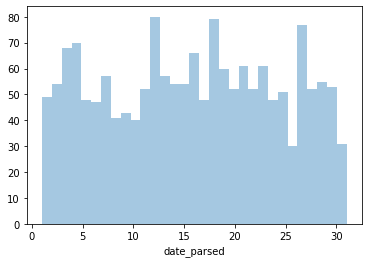

In [36]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

In [38]:
day_of_month_landslides.head(20)

0      2.0
1     22.0
2      6.0
3     14.0
4     15.0
5     20.0
6     24.0
7     21.0
8     27.0
9     27.0
10    27.0
11     1.0
12     4.0
13     8.0
14    13.0
15    24.0
16     9.0
17    11.0
18    14.0
19    17.0
Name: date_parsed, dtype: float64

In [39]:
# get the day of the month from the date_parsed column
month_landslides = landslides['date_parsed'].dt.month
month_landslides.head(20)

0     3.0
1     3.0
2     4.0
3     4.0
4     4.0
5     4.0
6     4.0
7     5.0
8     6.0
9     6.0
10    6.0
11    7.0
12    7.0
13    7.0
14    7.0
15    7.0
16    8.0
17    8.0
18    8.0
19    8.0
Name: date_parsed, dtype: float64

<AxesSubplot:xlabel='date_parsed'>

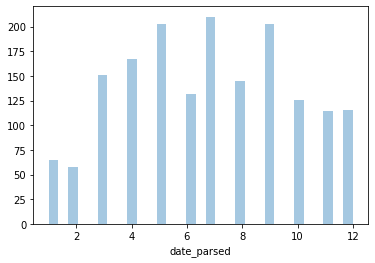

In [40]:
# remove na's
month_landslides = month_landslides.dropna()

# plot the day of the month
sns.distplot(month_landslides, kde=False, bins=31)

In [41]:
print(landslides.shape)


(1693, 24)


In [42]:
print(landslides.describe())

                id    population     distance     latitude    longitude  \
count  1693.000000  1.693000e+03  1692.000000  1692.000000  1692.000000   
mean   4145.027761  9.345940e+04     7.822695    27.715661   -86.883660   
std    2236.741960  5.226016e+05     9.358256    14.206341    14.332811   
min      34.000000  0.000000e+00     0.000030   -10.125800  -117.309200   
25%    2330.000000  2.080000e+03     1.936360    14.085650   -92.646625   
50%    4087.000000  5.785000e+03     4.538635    35.613200   -83.653000   
75%    6098.000000  1.886700e+04     9.873865    39.546400   -78.851325   
max    7541.000000  1.229419e+07    74.460970    45.425700   -45.601000   

         injuries   fatalities  
count  515.000000  1446.000000  
mean     0.526214     1.459198  
std      3.427514     9.184653  
min      0.000000     0.000000  
25%      0.000000     0.000000  
50%      0.000000     0.000000  
75%      0.000000     0.000000  
max     45.000000   280.000000  
